In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Data
X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
    55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
    45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
    48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
    78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
    55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
    60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

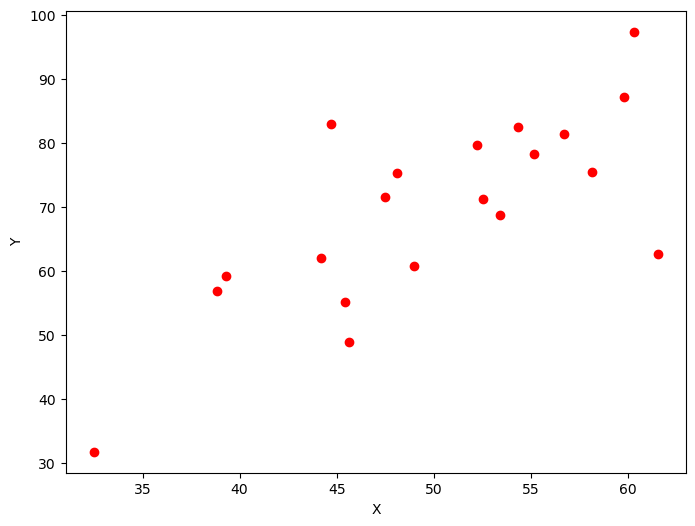

In [3]:
######################### Data Visualization #################################

plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
class gradient_descent_implementation:
    def __init__(self, X, Y, learning_rate, number_of_itr, stopping_threshold):

        self.X =X
        self.Y =Y

        self.learning_rate = learning_rate
        self.number_of_itr = number_of_itr
        self.stopping_threshold= stopping_threshold #stopping_threshold is used for evaluating cost improvement 

        self.costs =[] #keep track of all the cost 
        self.weights =[] #keep track of all the weights improved 
        self.biases =[] #keep track of all the biases improved 

    def mean_squared_error(self, y_true, y_predicted):	
        # Calculating the loss or cost
        cost = np.sum((y_true-y_predicted)**2) / len(y_true)
        return cost    
    
    def gradient_descent(self):
        
        # Initializing weight, bias, learning rate and iterations
        # fit the line y= weight . x + bias  
        current_weight = 0.1 
        current_bias = 0.01
        
        iterations = self.number_of_itr
        learning_rate = self.learning_rate
        stopping_threshold = self.stopping_threshold
        n = float(len(self.X))
       
        previous_cost = None
        
        # Estimation of optimal parameters 
        for i in range(iterations):
            
            # Making predictions
            y_predicted = (current_weight * self.X) + current_bias
            
            # Calculating the current cost
            current_cost = self.mean_squared_error(self.Y, y_predicted)

            # If the change in cost is less than or equal to stopping_threshold we stop the gradient descent
            if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
                break
            
            previous_cost = current_cost

            self.costs.append(current_cost)
            self.weights.append(current_weight)
            self.biases.append(current_bias)
            
            # Calculating the gradients
            weight_derivative = -(2/n) * sum(self.X * (self.Y-y_predicted))
            bias_derivative = -(2/n) * sum(self.Y-y_predicted)
            
            # Updating weights and bias
            current_weight = current_weight - (learning_rate * weight_derivative)
            current_bias = current_bias - (learning_rate * bias_derivative)
                    
            # Printing the parameters for each 1000th iteration
            # print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_weight}, Bias {current_bias}")
        
        
        return (current_weight, current_bias)
    
    def plot (self, x, y, title, x_label, y_label):
        plt.figure(figsize = (8,6))
        plt.plot(x, y)
        plt.scatter(x, y, marker='o', color='red')
        plt.title(title)        
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()

    def plot_regression_line_GD(self,weight, bias, title, x_label, y_label):

        # Making predictions using estimated parameters
        Y_predict = weight * self.X +  bias

        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(self.X, self.Y, marker='o', color='red')
        ax.plot([min(self.X), max(self.X)], [min(Y_predict), max(Y_predict)], color='blue', markerfacecolor='red', markersize=10,linestyle='dashed')

        # annotate the equation in the plot
        equation = f'Y = {weight:.2f} * X + {bias:.2f}'
        fig.text(0.1, 0.95, equation, transform=fig.transFigure, fontsize=12,verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        # plt.tight_layout()
        plt.show()

    

Gradient descent algorithm found optimal value of weight = 1.389738813163012 and bias = 0.03509461674147458


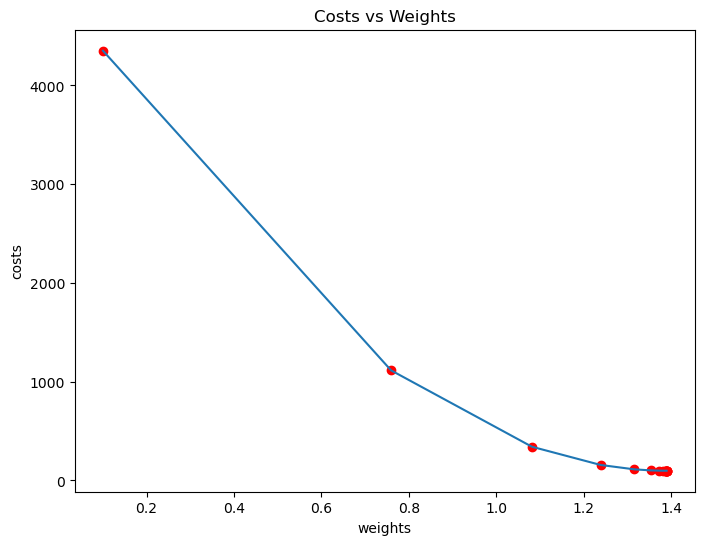

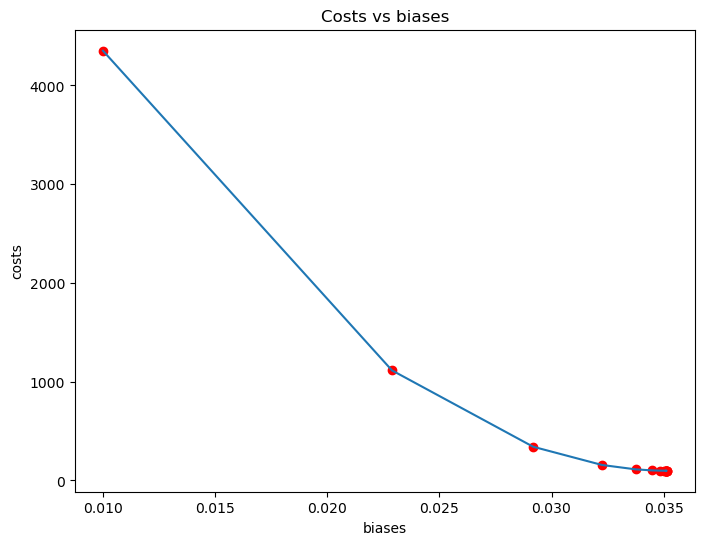

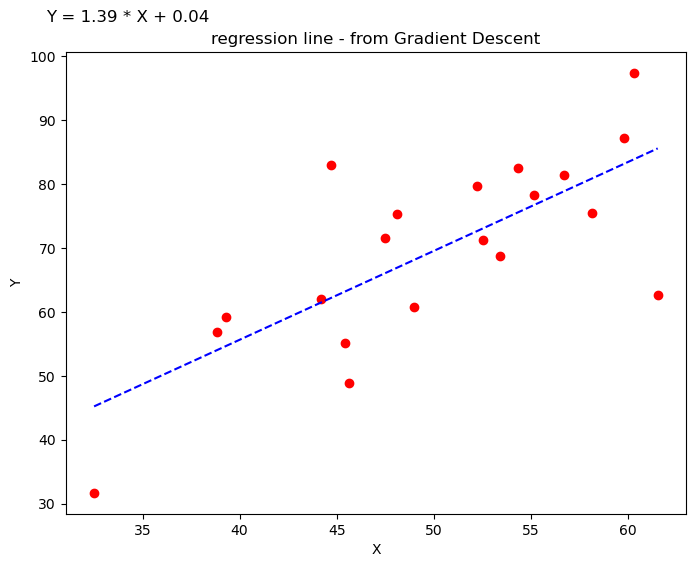

In [5]:
instant1 = gradient_descent_implementation(X,Y,learning_rate=0.0001, number_of_itr=1000, stopping_threshold = 1e-6)
weight, bias = instant1.gradient_descent()
print(f'Gradient descent algorithm found optimal value of weight = {weight} and bias = {bias}')
instant1.plot(instant1.weights, instant1.costs, 'Costs vs Weights', 'weights', 'costs',)
instant1.plot(instant1.biases, instant1.costs, 'Costs vs biases', 'biases', 'costs',)
instant1.plot_regression_line_GD(weight, bias, 'regression line - from Gradient Descent', 'X', 'Y')
